In [20]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'mod5_functions.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import ttest_ind

## Once this notebook has been used once, you can skip over this data initialization. If all steps were done in the same order, you'll end up with a `master_series.csv` which you can load and process.

---

In [80]:
# Using a custom function to utilize pytrends to get me the interest index
## From Google Trends Pseudo-API over a specified period of time
### Timeframe format --> 'YYYY-MM-DD YYYY-MM-DD' --> 'early recent'
# This one got '2000-01-01 current_date'
indoor_farming_int = get_int('indoor farming', '2000-01-01 2020-05-18')
# Saving this data
indoor_farming_int.to_csv('indoor_farming_interest')

# Saved the csv before
# indoor_farming = pd.read_csv('indoor_farming_interest')
# indoor_farming['date'] = pd.to_datetime(indoor_farming['date'])
# indoor_farming.set_index('date', inplace=True)

---

Going to build a `pytrends` payload for the term **indoor farming** and return some of the related topics.

In [31]:
pytrends.build_payload(['indoor farming'], geo='US')

In [32]:
pytrends.related_topics()

{'indoor farming': {'rising':      value formattedValue                                               link  \
  0   117450       Breakout  /trends/explore?q=/m/03bxgrp&date=today+5-y&ge...   
  1   115200       Breakout  /trends/explore?q=/m/02py09&date=today+5-y&geo=US   
  2    84800       Breakout  /trends/explore?q=/g/11c5sr5trf&date=today+5-y...   
  3    78900       Breakout   /trends/explore?q=/m/02bv9&date=today+5-y&geo=US   
  4    63500       Breakout  /trends/explore?q=/m/04122r&date=today+5-y&geo=US   
  5    63400       Breakout  /trends/explore?q=/m/0gtvnb0&date=today+5-y&ge...   
  6    53750       Breakout   /trends/explore?q=/m/0h01f&date=today+5-y&geo=US   
  7    53650       Breakout  /trends/explore?q=/m/030jx3&date=today+5-y&geo=US   
  8    53350       Breakout   /trends/explore?q=/m/0hkst&date=today+5-y&geo=US   
  9    52500       Breakout   /trends/explore?q=/m/09759&date=today+5-y&geo=US   
  10   45750       Breakout  /trends/explore?q=/m/01238b&date=today+5-

Gathering data on related topics to indoor farming. The goal is to average all of the values together to get a topic wide understanding of the trends.  
  
I will be using the `get_int()` function from before to gather the data, and then save it into a csv for future use.

---

In [81]:
greenhouse_int = get_int('greenhouse', '2000-01-01 2020-05-18')

In [82]:
greenhouse_int.to_csv('greenhouse.csv')

In [34]:
# Only run this cell if you have already run the above cell, and are revisiting this notebook
# greenhouse = pd.read_csv('greenhouse.csv')
# greenhouse['date'] = pd.to_datetime(greenhouse['date'])
# greenhouse.set_index('date', inplace=True)

In [83]:
hydroponics_int = get_int('hydroponic','2000-01-01 2020-05-18')
hydroponics_int.to_csv('hydroponics.csv')

In [84]:
vfarm_int = get_int('vertical farming', '2000-01-01 2020-05-18')
vfarm_int.to_csv('final_vfarm.csv')

In [85]:
urban_int = get_int('urban agriculture', '2000-01-01 2020-05-18')
urban_int.to_csv('urban_final.csv')

In [86]:
aeroponics_int = get_int('aeroponics', '2000-01-01 2020-05-18')
aeroponics_int.to_csv('aeroponics.csv')

---

In [60]:
# Only run this cell if you have already downloaded all of the interest indices

# greenhouse_int = pd.read_csv('greenhouse.csv')
# greenhouse_int['date'] = pd.to_datetime(greenhouse_int['date'])
# greenhouse_int.set_index('date', inplace=True)

# vfarm_int = pd.read_csv('final_vfarm.csv')
# vfarm_int['date'] = pd.to_datetime(vfarm_int['date'])
# vfarm_int.set_index('date', inplace=True)

# hydroponics_int = pd.read_csv('hydroponics.csv')
# hydroponics_int['date'] = pd.to_datetime(hydroponics_int['date'])
# hydroponics_int.set_index('date', inplace=True)

# urban_int = pd.read_csv('urban_final.csv')
# urban_int['date'] = pd.to_datetime(urban_int['date'])
# urban_int.set_index('date', inplace=True)

# aeroponics_int = pd.read_csv('aeroponics.csv')
# aeroponics_int['date'] = pd.to_datetime(aeroponics_int['date'])
# aeroponics_int.set_index('date', inplace=True)

---

In [87]:
# Going to average these series together to get a whole topic understanding
master = (aeroponics_int['aeroponics']+urban_int['urban agriculture']+vfarm_int['vertical farming']+
          hydroponics_int['hydroponic']+indoor_farming_int['indoor farming']+
          greenhouse_int['greenhouse'])/6

In [88]:
master = master.to_frame()
master = rename_column(master, 0, 'interest')

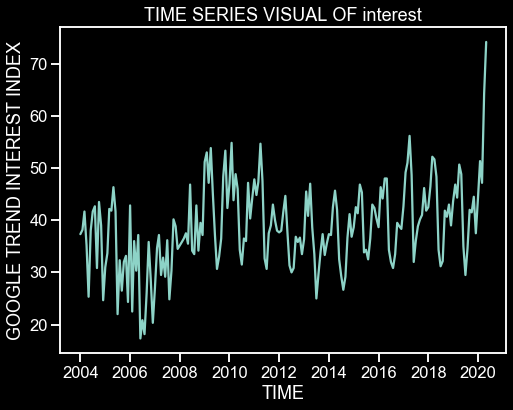

In [89]:
nice_plot(master, 'interest')

---

### Loading the previously saved csv

In [90]:
master.to_csv('master_series.csv')

In [2]:
# Only run this cell once you have saved down the master file
master = pd.read_csv('master_series.csv')
master['date'] = pd.to_datetime(master['date'])
master.set_index('date', inplace=True)

In [4]:
gen_dftest(master, 'interest')

Test Stat                -0.715452
P-Value                   0.842706
# Lags                   12.000000
# Observations          184.000000
Critical Value (1%)      -3.466398
Critical Value (5%)      -2.877380
Critical Value (10%)     -2.575214
dtype: float64

The data that I have compiled, top five related terms to **indoor farming**, is not a stationary time series.

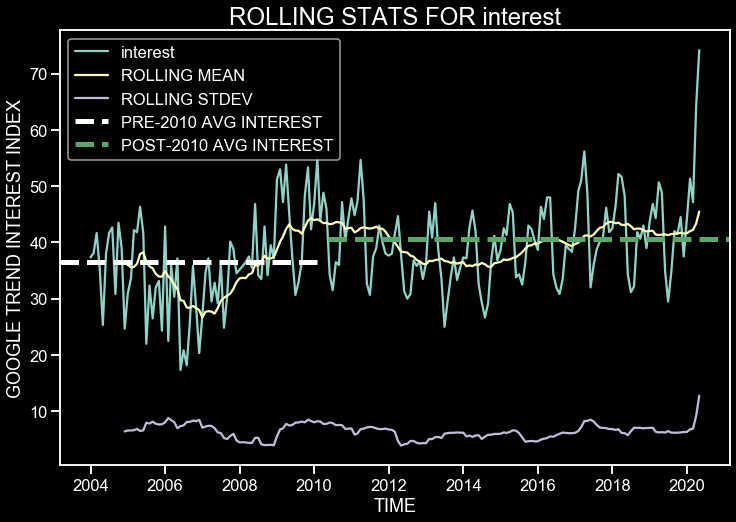

In [7]:
rolling_stats(master, 'interest', 12)

In [8]:
# Testing the average interest score between the past decade and the current
# Want to see if they are statistically different
ttest_ind(master[:'2009']['interest'], master['2010':]['interest'], equal_var=False)

Ttest_indResult(statistic=-4.3410684297518785, pvalue=2.739518513973633e-05)

**The interest index mean prior to 2010 is statistically less than the interest index mean post 2010.**

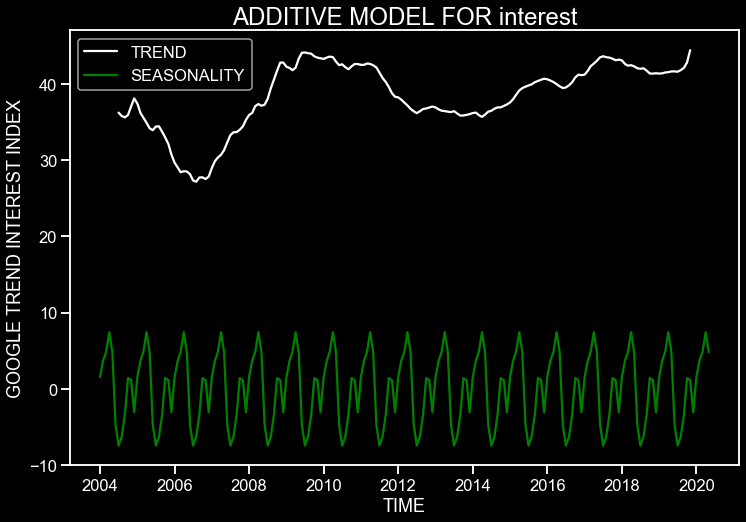

In [9]:
szn_decomp(master, 'interest', model=['additive'],
           graphs=['trend', 'szn'])

Quite a bit of seasonality in this data. Will be taking this into consideration as I converge on a final model.

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

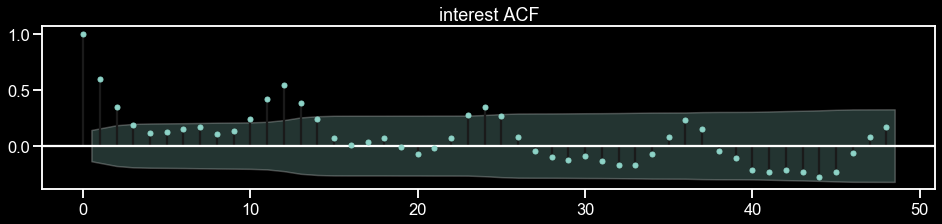

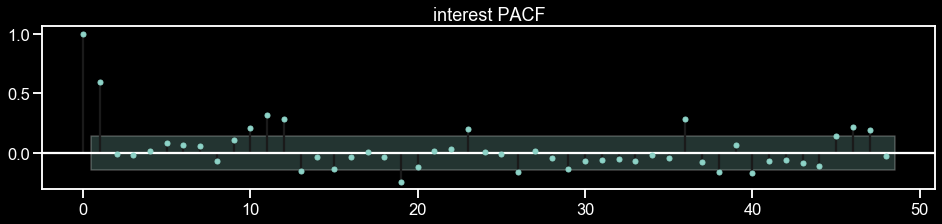

In [94]:
auto_corrs(master, 'interest')

---

### Baseline Model using (0,1,0)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:               interest   No. Observations:                  168
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -560.510
Date:                Tue, 19 May 2020   AIC                           1123.020
Time:                        16:28:15   BIC                           1126.138
Sample:                    01-01-2004   HQIC                          1124.285
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        48.1738      4.902      9.827      0.000      38.566      57.782
Ljung-Box (Q):                      114.73   Jarque-Bera (JB):                 6.58
Prob(Q):                              0.00   Pr

Text(0.5, 1.0, 'BASELINE SARIMA MODEL')

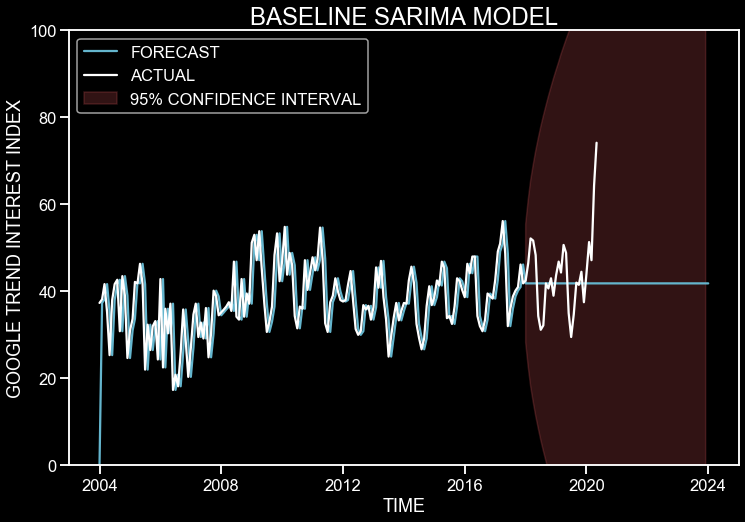

In [26]:
baseline = SARIMAX(master['2004':'2017'], order=(0,1,0))
fit = baseline.fit()
print(fit.summary())
forecast = fit.predict(start='2004-01-01', end='2024-01-01')
print('\nForecasting 72 months into the future from the\ntraining data (2018 - 2024)\n.....\n....\n...\n..\n.')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
prediction = fit.get_forecast(steps=72)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='c')
sns.lineplot(x=master['2004':].index,
             y=master['2004':]['interest'], color='w')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='r', alpha=0.25)
plt.legend(['FORECAST','ACTUAL', '95% CONFIDENCE INTERVAL'], loc='upper left')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.ylim(0,100)
plt.title(f'BASELINE SARIMA MODEL', size=24)

Figure(1440x720)


,baseline model
AIC,1123.019692
BIC,1126.137686
MAE,5.669643
TRAIN RMSE,7.495556
TEST RMSE,9.569768


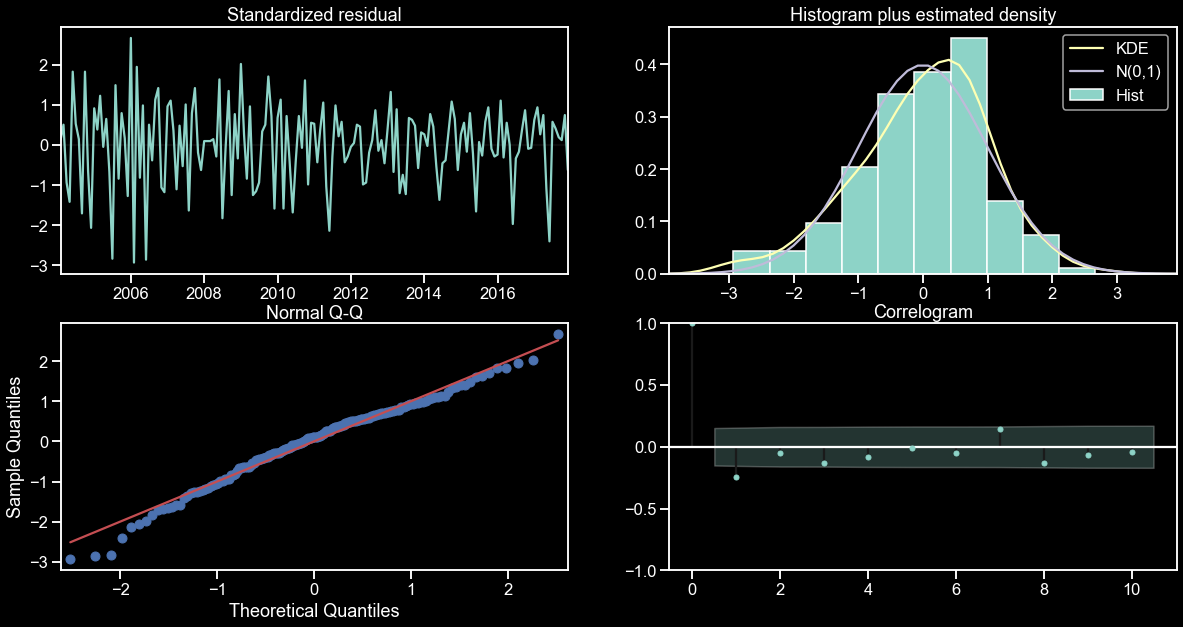

In [27]:
baseline_scores = make_chart(fit, 'baseline model')
print(fit.plot_diagnostics(figsize=(20,10)))
baseline_scores

Baseline with one order of differencing performed decent. Low RMSE, but judging by the confidence interval, could do better.

---

### Using the EDA to Build a Model

Due to the seasonality of this data, I am going to make a preliminary model with parameters loosely based on the previous EDA. Based on these visuals it seems to have an annual seasonality going on, setting m=12.  
  
Will be basing this model off of the baseline.  
  
### (0,1,0)x(0,1,0,12)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -541.163
Date:                            Tue, 19 May 2020   AIC                           1084.325
Time:                                    16:28:34   BIC                           1087.369
Sample:                                01-01-2004   HQIC                          1085.561
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        63.1128      5.414     11.656      0.000      52.501      73.725
Ljung-Box (Q):                     

Text(0.5, 1.0, 'SARIMA MODEL #1')

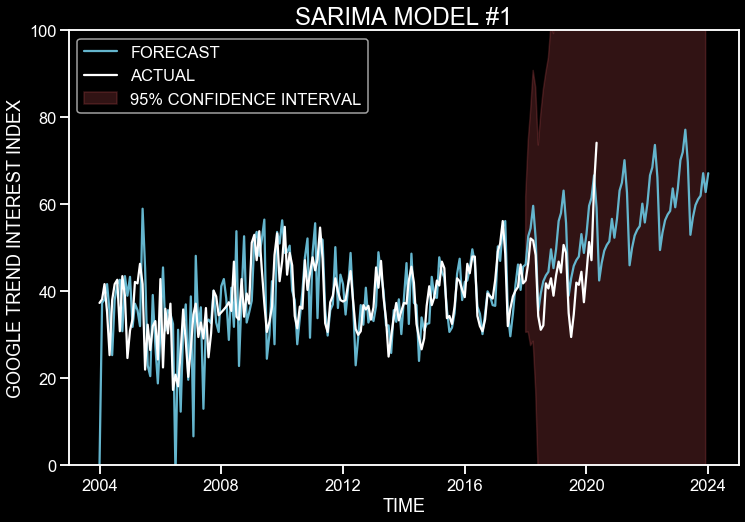

In [28]:
model = SARIMAX(master['2004':'2017'], order=(0,1,0), seasonal_order=(0, 1, 0, 12))
fit = model.fit()
print(fit.summary())
forecast = fit.predict(start='2004-01-01', end='2024-01-01')
print('\nForecasting 72 months into the future from the\ntraining data (2018 - 2024)\n.....\n....\n...\n..\n.')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
prediction = fit.get_forecast(steps=72)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='c')
sns.lineplot(x=master['2004':].index,
             y=master['2004':]['interest'], color='w')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='r', alpha=0.25)
plt.legend(['FORECAST','ACTUAL', '95% CONFIDENCE INTERVAL'], loc='upper left')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.ylim(0,100)
plt.title(f'SARIMA MODEL #1', size=24)

Figure(1440x720)


,eda based model
AIC,1084.325114
BIC,1087.368539
MAE,6.233138
TRAIN RMSE,8.514960
TEST RMSE,8.523800


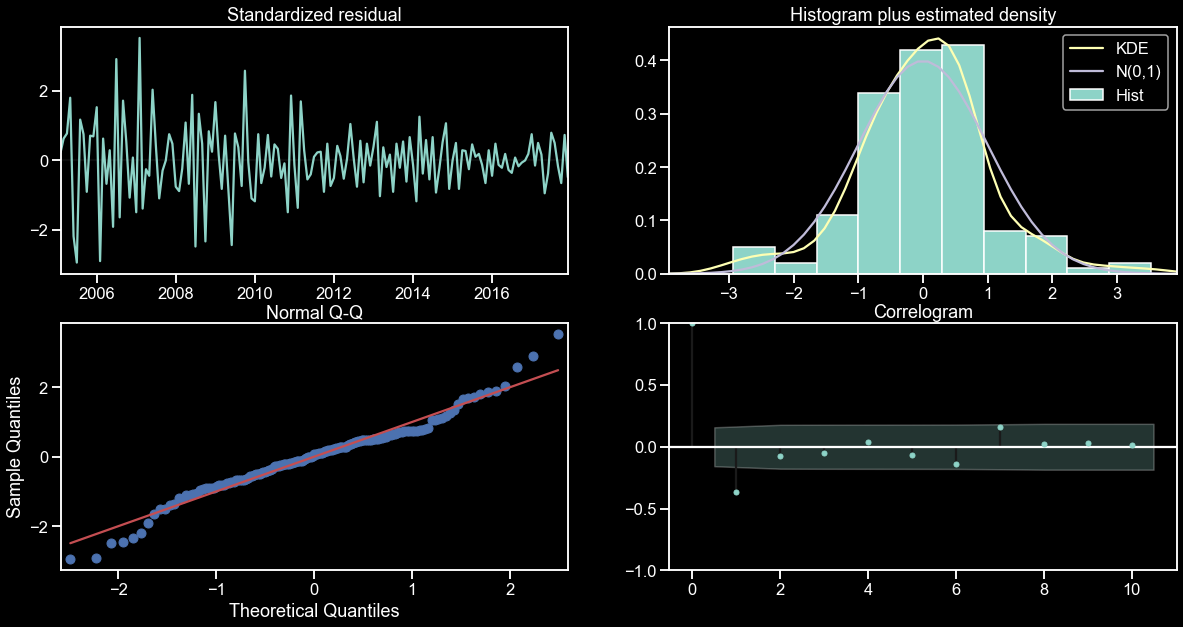

In [29]:
eda_based_model = make_chart(fit, 'eda based model')
print(fit.plot_diagnostics(figsize=(20,10)))
eda_based_model

Interesting results. The confidence interval doesn't spark confidence in this model. I want a model that is a good fit, that predicts decently well but not perfect, and most importantly, has a visible confidence interval. I want my model to be stable over time. If it explodes after only a few predictions that is not useful!

---

### Final Modeling pt1 - Using *auto_arima*
`auto_arima` will search through different parameters for (pdq) and (PDQ), given an **_m_** value.  
The **_m_** is a value that tells the model what kind of seasonality the data has. In this case, we have an annual bump happening, so **m=12**.


In [ ]:
# Searching for best params
# I want the search to start from zero on the (pq) and (PQ) fronts
# Will be includinga default one order of differencing and seasonality
model = auto_arima(master['2004':'2017'], trace=True, start_p=0, start_q=0, d=1,
                  start_P=0, start_Q=0, seasonal=True, m=12, suppress_warnings=True, 
                   D=1, error_action='ignore', approximation=False, trend='t', random_state=42)
fitted = model.fit(master['2004':'2017'])

In [197]:
# auto_arima models have a .get_params method to get the best parameters based on AIC reduction
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))



The best order parameters are (1, 1, 1),(0, 1, 1, 12)



/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -488.465
Date:                            Tue, 19 May 2020   AIC                            986.929
Time:                                    16:31:29   BIC                           1002.147
Sample:                                01-01-2004   HQIC                           993.110
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       7.939e-05      0.000      0.207      0.836      -0.001       0.001
ar.L1          0.1332      0.104   

Text(0.5, 1.0, '1st AUTO SARIMA MODEL')

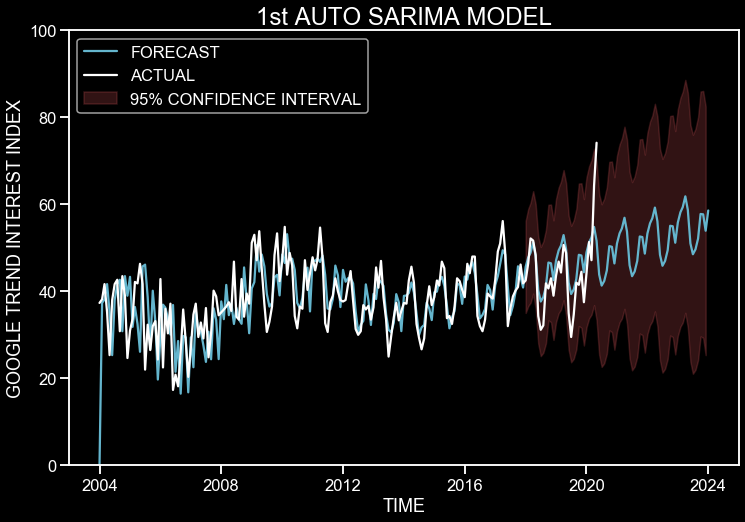

In [30]:
auto_mod1 = SARIMAX(master['2004':'2017'], order=(1,1,1), seasonal_order=(0,1,1,12),
                trend='t')
fit = auto_mod1.fit()
print(fit.summary())
forecast = fit.predict(start='2004-01-01', end='2024-01-01')
print('\nForecasting 72 months into the future from the\ntraining data (2018 - 2024)\n.....\n....\n...\n..\n.')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
prediction = fit.get_forecast(steps=72)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='c')
sns.lineplot(x=master['2004':].index,
             y=master['2004':]['interest'], color='w')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='r', alpha=0.25)
plt.legend(['FORECAST','ACTUAL', '95% CONFIDENCE INTERVAL'], loc='upper left')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.ylim(0,100)
plt.title(f'1st AUTO SARIMA MODEL', size=24)

Figure(1440x720)


,auto model 1
AIC,986.929452
BIC,1002.146577
MAE,4.845020
TRAIN RMSE,6.888213
TEST RMSE,6.444952


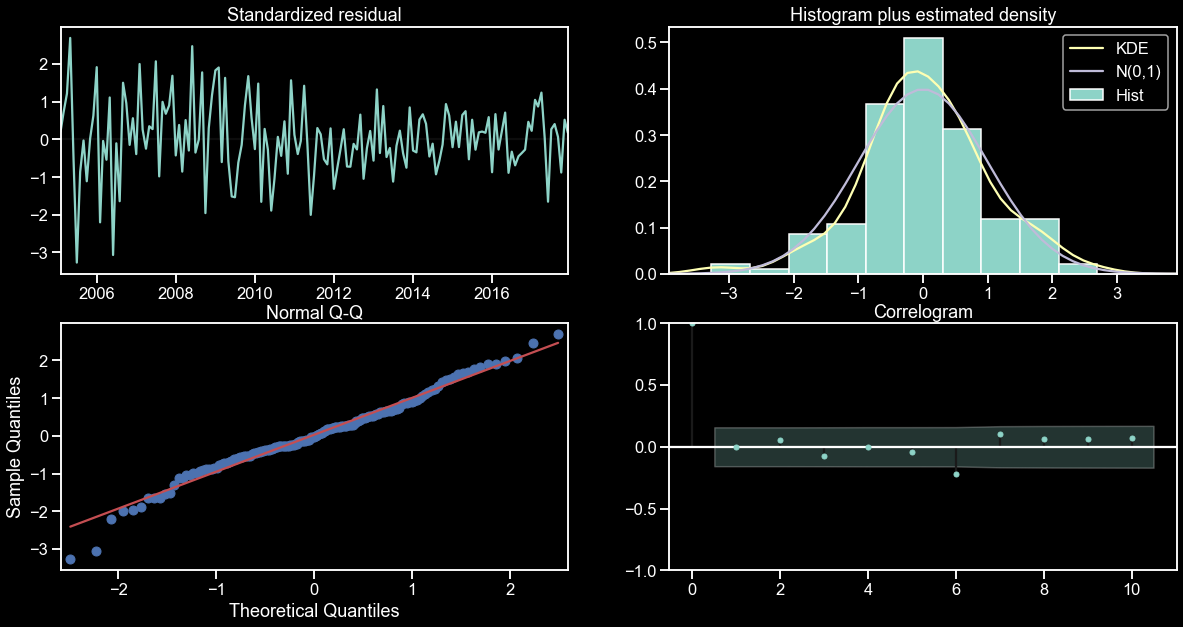

In [31]:
auto_mod_1 = make_chart(fit, 'auto model 1')
print(fit.plot_diagnostics(figsize=(20,10)))
auto_mod_1

The confidence interval is tightening up a bit and I think the search can improve with tuned search parameters. Better AIC and RMSE, QQ plot looks good, and the distribution follows the Gaussian curve.

My next `auto_arima` search is going to include no default levels of differencing.

---

### Final Modeling pt2

In [200]:
model = auto_arima(master['2004':'2017'], trace=True, start_p=0, start_q=0,
                  start_P=0, start_Q=0, seasonal=True, m=12, suppress_warnings=True,
                   error_action='ignore', approximation=False, trend='t', random_state=42)
fitted = model.fit(master['2004':'2017'])

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=1125.014, BIC=1131.250, Time=0.057 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=1094.732, BIC=1107.204, Time=0.155 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=1087.854, BIC=1100.326, Time=0.371 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=1125.014, BIC=1131.250, Time=0.033 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=1112.133, BIC=1121.487, Time=0.077 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=1055.528, BIC=1071.118, Time=0.809 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=1075.891, BIC=1088.363, Time=0.432 seconds
Fit ARIMA(0,1,1)x(2,0,1,12) [intercept=True]; AIC=1061.405, BIC=1080.113, Time=1.793 seconds
Fit ARIMA(0,1,1)x(1,0,2,12) [intercept=True]; AIC=1060.145, BIC=1078.853, Time=2.735 seconds
Fit ARIMA(0,1,1)x(0,0,2,12) [intercept=True]; AIC=1084.838, BIC=1100.428, Time=1.219 seconds
Fit ARIMA(0,1,1)x(2,0,0,12

In [201]:
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))



The best order parameters are (0, 1, 2),(1, 0, 1, 12)



/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                      SARIMAX Results                                       
Dep. Variable:                             interest   No. Observations:                  168
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -520.730
Date:                              Tue, 19 May 2020   AIC                           1053.459
Time:                                      16:32:01   BIC                           1072.167
Sample:                                  01-01-2004   HQIC                          1061.053
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0001      0.001      0.250      0.802      -0.001       0.001
ma.L1         -0.63

Text(0.5, 1.0, '2nd AUTO SARIMA MODEL')

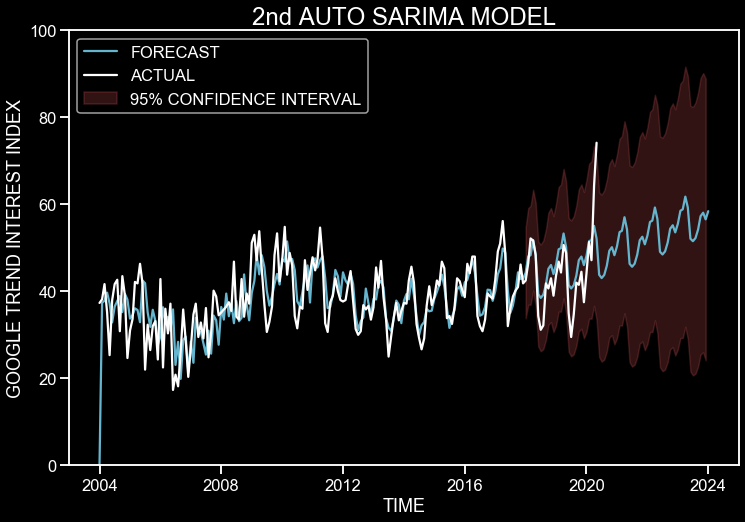

In [32]:
auto_mod2 = SARIMAX(master['2004':'2017'], order=(0,1,2), seasonal_order=(1,0,1,12),
                trend='t')
fit = auto_mod2.fit()
print(fit.summary())
forecast = fit.predict(start='2004-01-01', end='2024-01-01')
print('\nForecasting 72 months into the future from the\ntraining data (2018 - 2024)\n.....\n....\n...\n..\n.')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
prediction = fit.get_forecast(steps=72)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='c')
sns.lineplot(x=master['2004':].index,
             y=master['2004':]['interest'], color='w')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='r', alpha=0.25)
plt.legend(['FORECAST','ACTUAL', '95% CONFIDENCE INTERVAL'], loc='upper left')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.ylim(0,100)
plt.title(f'2nd AUTO SARIMA MODEL', size=24)

Figure(1440x720)


,auto model 2
AIC,1053.459483
BIC,1072.167446
MAE,4.331074
TRAIN RMSE,6.244519
TEST RMSE,6.435690


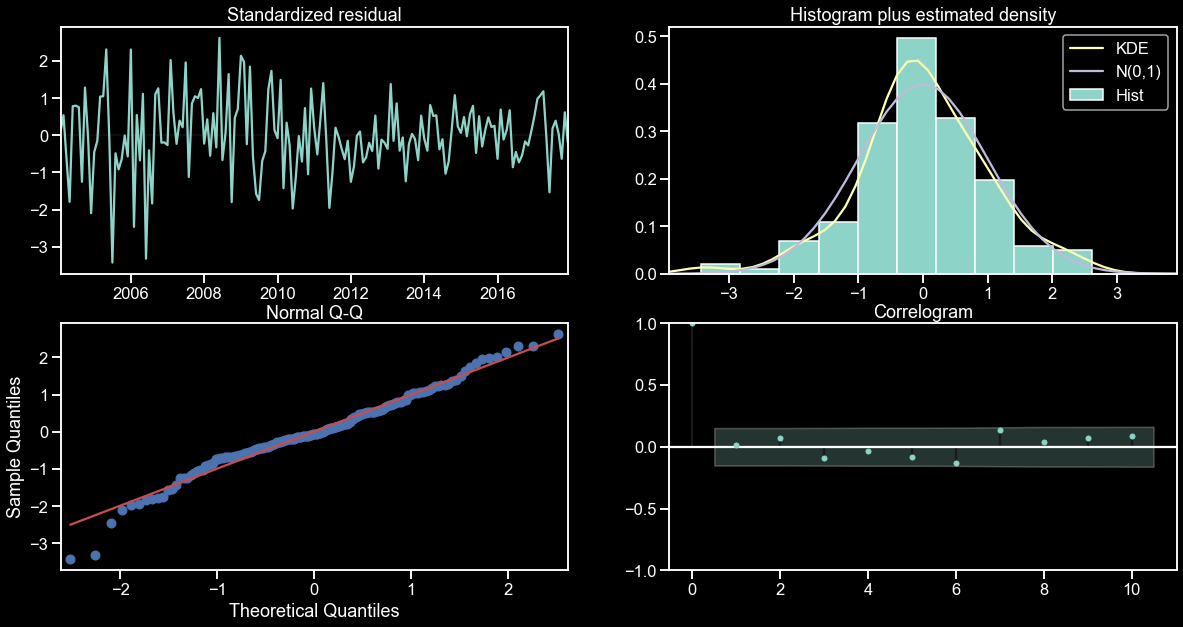

In [33]:
auto_mod_2 = make_chart(fit, 'auto model 2')
print(fit.plot_diagnostics(figsize=(20,10)))
auto_mod_2

Performed a little better. I want to look into an auto search that doesn't have any of my starting parameter bias, and just let it run.

---

### Final Modeling pt3

In [224]:
# Note that I have removed the starting parameters specifications
# Going to try the different methods
model = auto_arima(master['2004':'2017'], trace=True, seasonal=True, m=12, suppress_warnings=True,
                error_action='ignore', approximation=False, trend='t', method='bfgs', random_state=42)
fitted = model.fit(master['2004':'2017'])
best_params = fitted.get_params()
print('\n\nThe best order parameters for {} solver are {},{}\n'.format(method,best_params['order'],best_params['seasonal_order']))

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=1065.342, BIC=1090.286, Time=5.921 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=1125.014, BIC=1131.250, Time=0.015 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=1094.732, BIC=1107.204, Time=0.182 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=1087.854, BIC=1100.326, Time=0.396 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=1125.014, BIC=1131.250, Time=0.019 seconds
Fit ARIMA(2,1,2)x(0,0,1,12) [intercept=True]; AIC=1070.315, BIC=1092.140, Time=3.907 seconds
Fit ARIMA(2,1,2)x(1,0,0,12) [intercept=True]; AIC=1067.521, BIC=1089.346, Time=2.982 seconds
Fit ARIMA(2,1,2)x(2,0,1,12) [intercept=True]; AIC=1069.770, BIC=1097.832, Time=7.595 seconds
Fit ARIMA(2,1,2)x(1,0,2,12) [intercept=True]; AIC=1061.923, BIC=1089.984, Time=5.425 seconds
Fit ARIMA(2,1,2)x(0,0,2,12) [intercept=True]; AIC=1071.950, BIC=1096.894, Time=7.869 seconds
Fit ARIMA(2,1,2)x(2,0,2,12

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -522.216
Date:                            Tue, 19 May 2020   AIC                           1056.431
Time:                                    16:32:23   BIC                           1075.139
Sample:                                01-01-2004   HQIC                          1064.025
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.000      0.326      0.744      -0.001       0.001
ar.L1          0.2556      0.090   

,auto model 3
AIC,1056.431484
BIC,1075.139447
MAE,4.360237
TRAIN RMSE,6.239532
TEST RMSE,6.945238


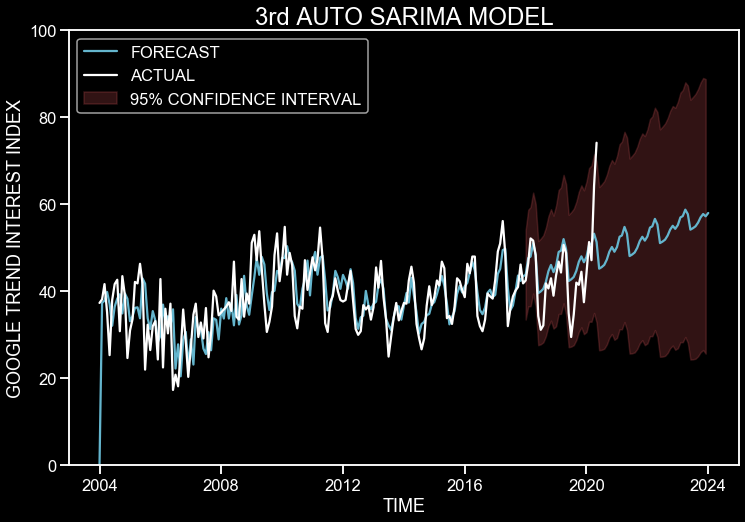

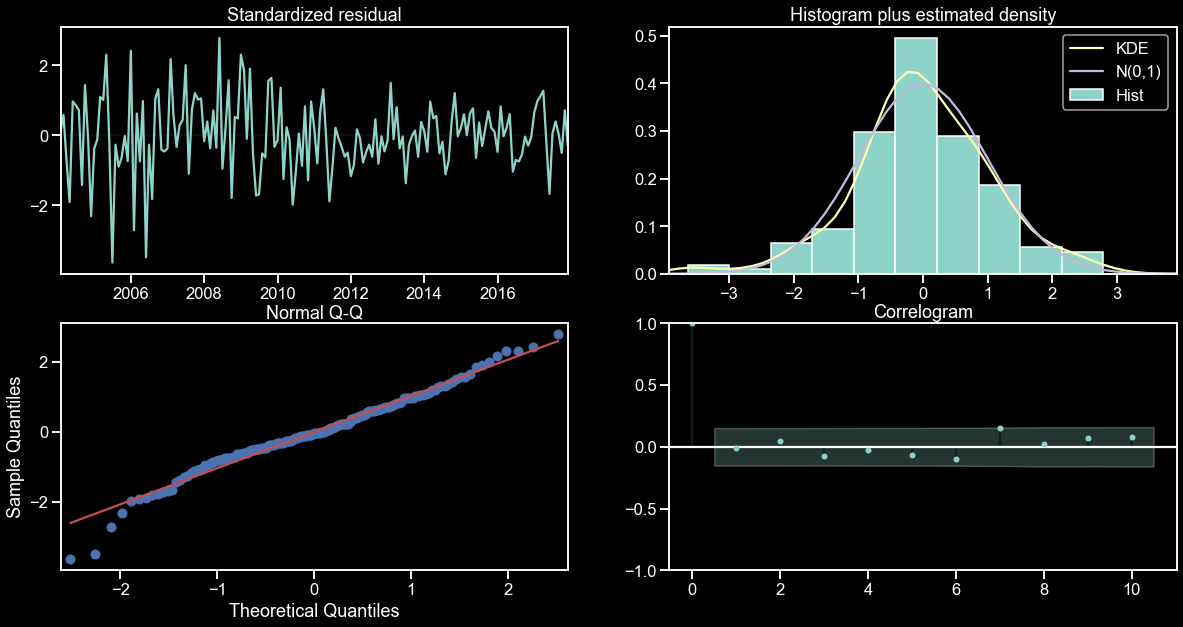

In [34]:
auto_mod3 = SARIMAX(master['2004':'2017'], order=(1,1,1), seasonal_order=(1,0,1,12),
                trend='t')
fit = auto_mod3.fit()
print(fit.summary())
forecast = fit.predict(start='2004-01-01', end='2024-01-01')
print('\nForecasting 72 months into the future from the\ntraining data (2018 - 2024)\n.....\n....\n...\n..\n.')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
prediction = fit.get_forecast(steps=72)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='c')
sns.lineplot(x=master['2004':].index,
             y=master['2004':]['interest'], color='w')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='r', alpha=0.25)
plt.legend(['FORECAST','ACTUAL', '95% CONFIDENCE INTERVAL'], loc='upper left')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.ylim(0,100)
plt.title(f'3rd AUTO SARIMA MODEL', size=24)
auto_mod_3 = make_chart(fit, 'auto model 3')
print(fit.plot_diagnostics(figsize=(20,10)))
auto_mod_3

In [226]:
# Trying the powell optimizer
model = auto_arima(master['2004':'2017'], trace=True, seasonal=True, m=12, suppress_warnings=True,
                error_action='ignore', approximation=False, trend='t', method='powell', random_state=42)
fitted = model.fit(master['2004':'2017'])
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=1056.184, BIC=1081.128, Time=1.859 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=1125.014, BIC=1131.250, Time=0.072 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=1094.732, BIC=1107.204, Time=0.178 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=1087.854, BIC=1100.326, Time=0.451 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=1125.014, BIC=1131.250, Time=0.069 seconds
Fit ARIMA(2,1,2)x(0,0,1,12) [intercept=True]; AIC=1070.445, BIC=1092.271, Time=1.029 seconds
Fit ARIMA(2,1,2)x(1,0,0,12) [intercept=True]; AIC=1067.418, BIC=1089.244, Time=1.304 seconds
Fit ARIMA(2,1,2)x(2,0,1,12) [intercept=True]; AIC=1057.809, BIC=1085.871, Time=4.710 seconds
Fit ARIMA(2,1,2)x(1,0,2,12) [intercept=True]; AIC=1057.714, BIC=1085.776, Time=3.164 seconds
Fit ARIMA(2,1,2)x(0,0,0,12) [intercept=True]; AIC=1093.425, BIC=1112.133, Time=0.461 seconds
Fit ARIMA(2,1,2)x(0,0,2,12

No difference

In [227]:
# Trying the cg optimizer
model = auto_arima(master['2004':'2017'], trace=True, seasonal=True, m=12, suppress_warnings=True,
                error_action='ignore', approximation=False, trend='t', method='cg', random_state=42)
fitted = model.fit(master['2004':'2017'])
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=1493.784, BIC=1518.728, Time=3.490 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=1608.570, BIC=1614.806, Time=0.114 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=1657.300, BIC=1669.772, Time=1.832 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=1270.143, BIC=1282.615, Time=2.421 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=1608.570, BIC=1614.806, Time=0.092 seconds
Fit ARIMA(0,1,1)x(0,0,0,12) [intercept=True]; AIC=1184.238, BIC=1193.592, Time=0.633 seconds
Fit ARIMA(0,1,1)x(1,0,0,12) [intercept=True]; AIC=1194.370, BIC=1206.842, Time=0.378 seconds
Fit ARIMA(0,1,1)x(1,0,1,12) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(1,1,1)x(0,0,0,12) [intercept=True]; AIC=1144.334, BIC=1156.806, Time=0.644 seconds
Fit ARIMA(1,1,1)x(1,0,0,12) [intercept=True]; AIC=1209.196, BIC=1224.786, Time=1.950 seconds
Fit ARIMA(1,1,1)x(0,0,1,12) [intercept

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:               interest   No. Observations:                  168
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -540.802
Date:                Tue, 19 May 2020   AIC                           1089.605
Time:                        16:32:41   BIC                           1102.077
Sample:                    01-01-2004   HQIC                          1094.667
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0002      0.000      0.511      0.609      -0.001       0.001
ar.L1          0.4844      0.098      4.929      0.000       0.292       0.677
ma.L1         -0.9400      0.036    -26.054      0.0

,auto model 4
AIC,1089.604943
BIC,1102.076918
MAE,4.954230
TRAIN RMSE,6.790770
TEST RMSE,9.138596


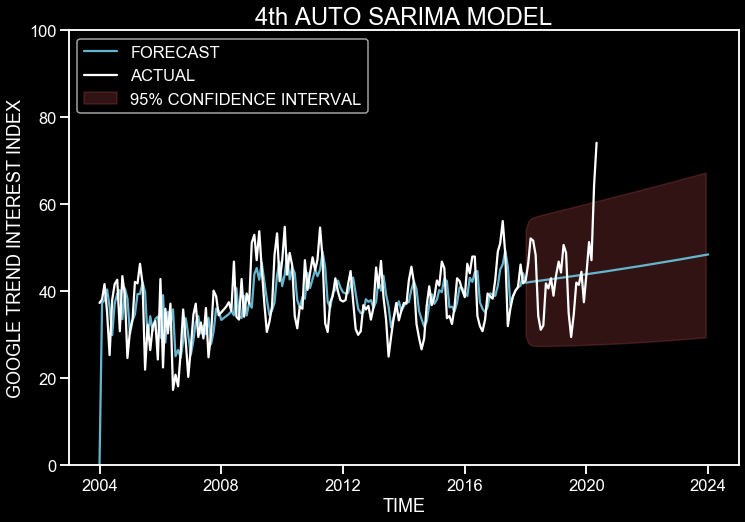

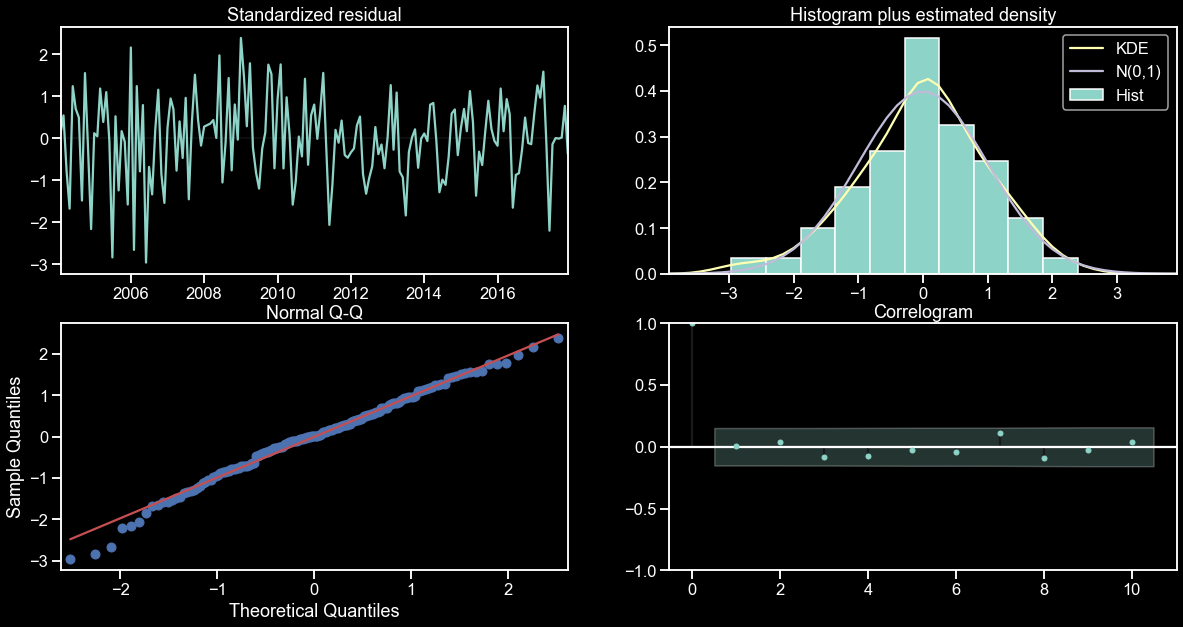

In [35]:
auto_mod4 = SARIMAX(master['2004':'2017'], order=(1,1,1), seasonal_order=(0,0,0,12),
                trend='t')
fit = auto_mod4.fit()
print(fit.summary())
forecast = fit.predict(start='2004-01-01', end='2024-01-01')
print('\nForecasting 72 months into the future from the\ntraining data (2018 - 2024)\n.....\n....\n...\n..\n.')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
prediction = fit.get_forecast(steps=72)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='c')
sns.lineplot(x=master['2004':].index,
             y=master['2004':]['interest'], color='w')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='r', alpha=0.25)
plt.legend(['FORECAST','ACTUAL', '95% CONFIDENCE INTERVAL'], loc='upper left')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.ylim(0,100)
plt.title(f'4th AUTO SARIMA MODEL', size=24)
auto_mod_4 = make_chart(fit, 'auto model 4')
print(fit.plot_diagnostics(figsize=(20,10)))
auto_mod_4

Previous solver was better.

In [229]:
# Using default solver - lbfgs
model = auto_arima(master['2004':'2017'], trace=True, seasonal=True, m=12, suppress_warnings=True,
                error_action='ignore', approximation=False, trend='t', random_state=42)
fitted = model.fit(master['2004':'2017'])
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=1061.042, BIC=1085.986, Time=0.922 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=1125.014, BIC=1131.250, Time=0.041 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=1094.732, BIC=1107.204, Time=0.261 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=1087.854, BIC=1100.326, Time=0.435 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=1125.014, BIC=1131.250, Time=0.035 seconds
Fit ARIMA(2,1,2)x(0,0,1,12) [intercept=True]; AIC=1070.019, BIC=1091.845, Time=0.727 seconds
Fit ARIMA(2,1,2)x(1,0,0,12) [intercept=True]; AIC=1067.447, BIC=1089.273, Time=0.845 seconds
Fit ARIMA(2,1,2)x(2,0,1,12) [intercept=True]; AIC=1064.447, BIC=1092.509, Time=2.714 seconds
Fit ARIMA(2,1,2)x(1,0,2,12) [intercept=True]; AIC=1063.525, BIC=1091.587, Time=2.672 seconds
Fit ARIMA(2,1,2)x(0,0,0,12) [intercept=True]; AIC=1093.469, BIC=1112.177, Time=0.259 seconds
Fit ARIMA(2,1,2)x(0,0,2,12

In [ ]:
auto_mod5 = SARIMAX(master['2004':'2017'], order=(1,1,1), seasonal_order=(2,0,2,12),
                trend='t')
fit = auto_mod5.fit()
print(fit.summary())
forecast = fit.predict(start='2004-01-01', end='2024-01-01')
print('\nForecasting 72 months into the future from the\ntraining data (2018 - 2024)\n.....\n....\n...\n..\n.')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
prediction = fit.get_forecast(steps=72)
pred_conf = prediction.conf_int()
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='c')
sns.lineplot(x=master['2004':].index,
             y=master['2004':]['interest'], color='w')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='r', alpha=0.25)
plt.legend(['FORECAST','ACTUAL', '95% CONFIDENCE INTERVAL'], loc='upper left')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.ylim(0,100)
plt.title(f'5th AUTO SARIMA MODEL', size=24)
auto_mod_5 = make_chart(fit, 'auto model 5')
print(fit.plot_diagnostics(figsize=(20,10)))
auto_mod_5

---

### Final Results Analysis

In [14]:
aic = compare_scores('AIC', [baseline_scores, eda_based_model, auto_mod_1, auto_mod_2,
                            auto_mod_3, auto_mod_4, auto_mod_5])
bic = compare_scores('BIC', [baseline_scores, eda_based_model, auto_mod_1, auto_mod_2,
                            auto_mod_3, auto_mod_4, auto_mod_5])
mae = compare_scores('MAE', [baseline_scores, eda_based_model, auto_mod_1, auto_mod_2,
                            auto_mod_3, auto_mod_4, auto_mod_5])
train_rmse = compare_scores('TRAIN RMSE', [baseline_scores, eda_based_model, auto_mod_1, auto_mod_2,
                            auto_mod_3, auto_mod_4, auto_mod_5])
test_rmse = compare_scores('TEST RMSE', [baseline_scores, eda_based_model, auto_mod_1, auto_mod_2,
                            auto_mod_3, auto_mod_4, auto_mod_5])
metrics = [aic, bic, mae, train_rmse, test_rmse]

In [15]:
aic

{'baseline model': 1123.019691957628,
 'eda based model': 1084.3251143448288,
 'auto model 1': 986.9294518210252,
 'auto model 2': 1053.4594827854155,
 'auto model 3': 1056.4314844671371,
 'auto model 4': 1089.6049429695754,
 'auto model 5': 1053.8427043553838}

In [16]:
bic

{'baseline model': 1126.1376857700448,
 'eda based model': 1087.368539461748,
 'auto model 1': 1002.1465774056214,
 'auto model 2': 1072.167445659916,
 'auto model 3': 1075.1394473416376,
 'auto model 4': 1102.0769182192423,
 'auto model 5': 1078.7866548547179}

In [17]:
test_rmse

{'baseline model': 9.569768010255784,
 'eda based model': 8.523800350416721,
 'auto model 1': 6.444951879311116,
 'auto model 2': 6.435689537510727,
 'auto model 3': 6.94523835892492,
 'auto model 4': 9.138596358782628,
 'auto model 5': 6.751863291433607}

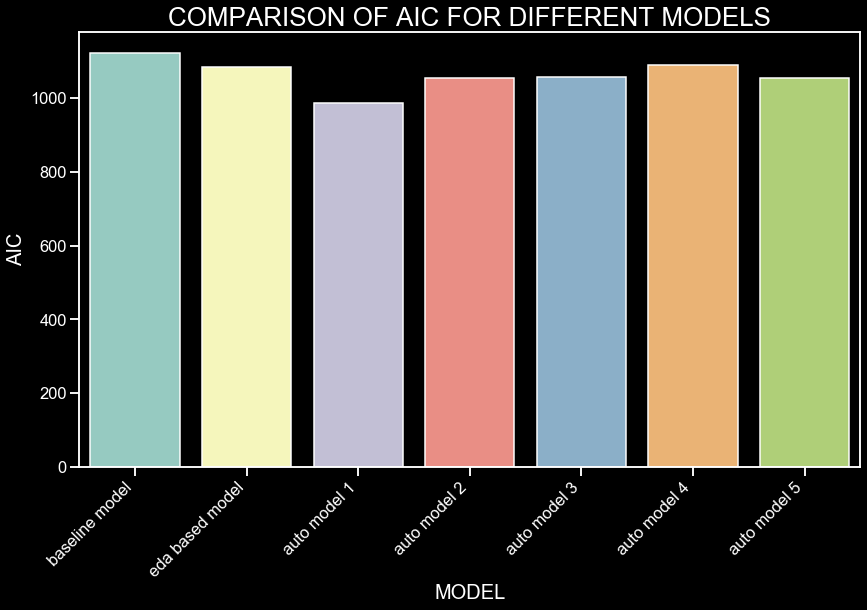

In [21]:
score_chart(list(aic.keys()), list(aic.values()), 'AIC')

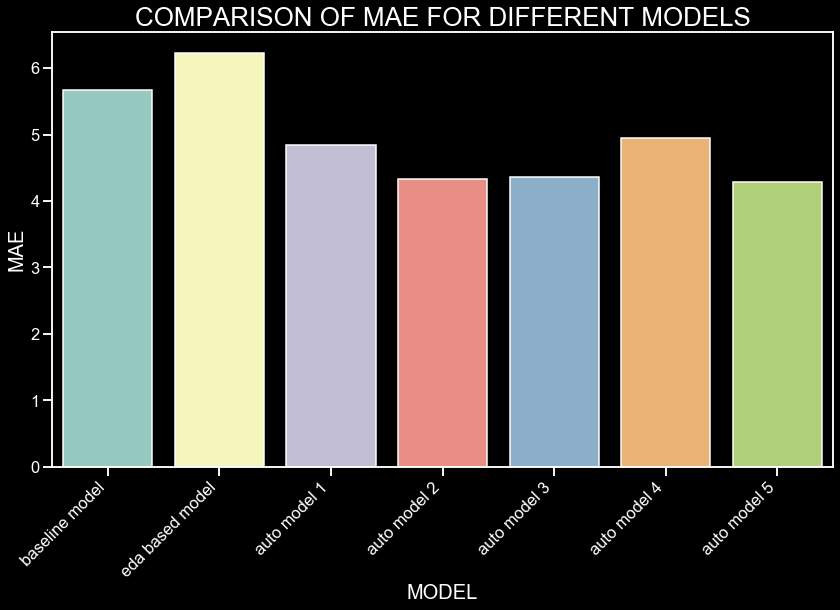

In [22]:
score_chart(list(mae.keys()), list(mae.values()),'MAE')

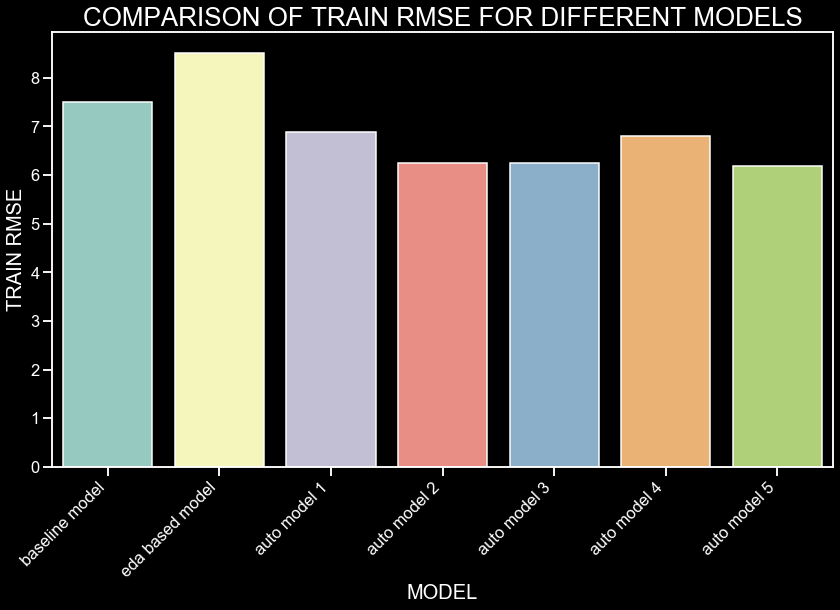

In [23]:
score_chart(list(train_rmse.keys()), list(train_rmse.values()), 'TRAIN RMSE')

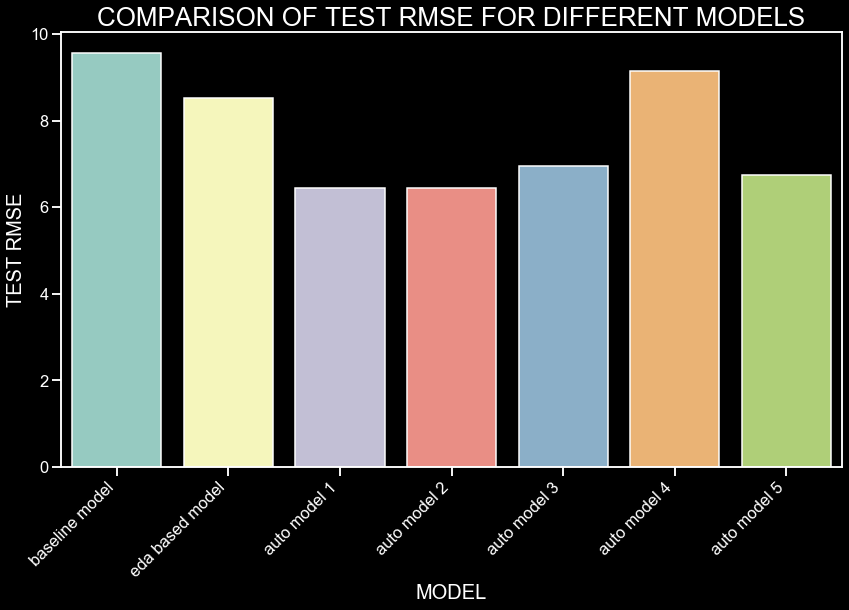

In [24]:
score_chart(list(test_rmse.keys()), list(test_rmse.values()), 'TEST RMSE')

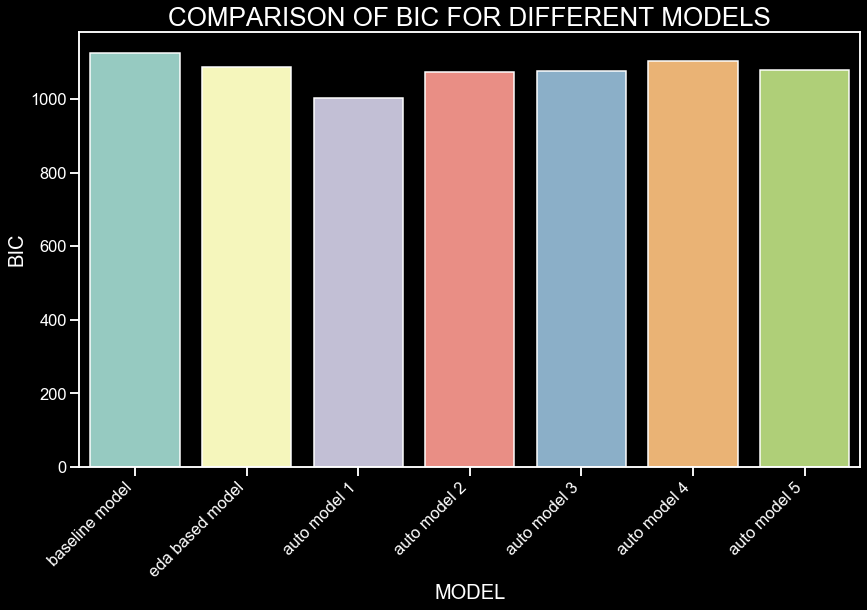

In [25]:
score_chart(list(bic.keys()), list(bic.values()), 'BIC')

In [358]:
for metric in metrics:
    temp = min(metric.values()) 
    res = [key for key in metric if metric[key] == temp] 
    print("Keys with minimum values are : " + str(res)) 

Keys with minimum values are : ['auto model 1']
Keys with minimum values are : ['auto model 1']
Keys with minimum values are : ['auto model 5']
Keys with minimum values are : ['auto model 5']
Keys with minimum values are : ['auto model 1']


It seems that the first auto model did best on AIC, BIC, and TEST RMSE, which are the important metrics to consider. I will use the parameters from the auto_mod_1 as my final.

## Final SARIMA Model Parameters:
* **trained on** = master['2004':'2017']
* **parameters** = trace=True, start_p=0, start_q=0, d=1,start_P=0, start_Q=0, seasonal=True, m=12, suppress_warnings=True, D=1, error_action='ignore', approximation=False, trend='t', random_state=42)
* **AIC** = 983.46
* **BIC** = 998.67
* **TEST_RMSE** = 6.04

trace=True, seasonal=True, m=12, suppress_warnings=True,
                error_action='ignore', approximation=False, trend='t', random_state=42